
# MIT808 Assignment 3 - Group 6 [2023]

## SDG Topics Visualization 

### Includes code for text cleaning, text clustering, topic modelling and visualization 

1. Pre-process text in text columns
2. Reduce the dimensionality of data
4. Cluster the articles and evaluate performance
5. Build Topic Model and evaluate performance
6. Visualize the topics

- Installing all necessary packages

In [1]:
# install base libraries
!pip install pandas matplotlib seaborn numpy
# to connect to Google Drive
!pip install pydrive  
# to expand shortened words e.g. we're to we are
!pip install contractions 
 # to vizualize the Elbow curve
!pip install yellowbrick 
 # for visualizing topics
!pip install pyLDAvis 
# for creating word clouds
!pip install wordcloud 
# hierachical density-based clustering
!pip install nltk
!pip install gensim        

- Importing the necesaary libraries

In [2]:
import pandas as pd                    # handles various data structures e.g. data frames
import numpy as np                     # for a variety of mathematical operations on numbers
import matplotlib.pyplot as plt        # for a variety of visualizations 
import seaborn as sns                  # statistical graphics
from sklearn.cluster import KMeans     # for Kmeans clustering 
import nltk                            # toolkit for NLP in Python
import gensim                          # text preprocessing and modelling
import pyLDAvis                        # produce interactive topic model visualizations 
#import hdbscan                         # hierachical density-based clustering

pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', 3000)
pd.set_option('display.max_rows', 500)

### Get the data from tab-separated (tsv) text files

- Create the necessary functions for getting and merging data 

In [3]:
def getData(file, id):
  df = pd.read_csv(file, sep='\t', parse_dates=True, index_col=id)  
  return df

- function to merge datasets

In [4]:
def mergeDatasets(df1, df2):
  
  mergedDataset = pd.merge(df1, df2, left_index=True, right_index=True) #, how='left'

  return mergedDataset

### Different methods to connect to the dataset

- Use this code to connect to the dataset on Google Drive from Google Colab 


In [5]:
# # Use this code to connect to the dataset on Google Drive from Google Colab 

# from google.colab import drive
# drive.mount('/content/drive', force_remount=True)

# # specify the data folder
# folder_path = '/content/drive/Shareddrives/ProjectData/'

-  Use this path when connecting to the local folder

In [6]:
# Use this path when connecting to the local folder
# specify the data folder -- replace the path with your local path
folder_path = r'C:/Users/Phoebe/Desktop/New_folder/LDAModel Files/'

- Use this method to connect to a folder on Google Drive from Jupyter Notebook

In [7]:
# from pydrive.auth import GoogleAuth
# from pydrive.drive import GoogleDrive
# from oauth2client.client import GoogleCredentials

# gauth = GoogleAuth()
# #gauth.credentials = GoogleCredentials.get_application_default()
# gauth.LocalWebserverAuth()
# drive = GoogleDrive(gauth)

# # Replace with the path to the folder containing the dataset
# folder_path = "/content/drive/Shareddrives/ProjectData/"

- specify the paths for the two datasets

In [8]:
path1 = folder_path + 'articles.tsv'
path2 =  folder_path + 'articles_inclAbstracts.tsv'

 - get the data into pandas dataframes by the index column 'handle'

In [9]:
df_articles = getData(path1, 'handle')
df_articles.head(1)

C:\Users\Phoebe\AppData\Local\Temp\ipykernel_3288\2703797552.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df = pd.read_csv(file, sep='\t', parse_dates=True, index_col=id)


,title,date,type,lang,authors,issn,doi,topics,keywords,slug_handle,repo,repo_url,institute,location,sdgs,targets,SDG1,SDG2,SDG3,SDG4,SDG5,SDG6,SDG7,SDG8,SDG9,SDG10,SDG11,SDG12,SDG13,SDG14,SDG15,SDG16,SDG17,topic,topic_prob
handle,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
http://hdl.handle.net/2123/138,Challenges and Prospect of Maintaining Rongga: an Ethnographic Report,2005-10-21,article,en,"Arka, I Wayan",NaN,NaN,NaN,"Language;Rongga,",http:--hdl-handle-net-2123-138,university_of_sydney,http://ses.library.usyd.edu.au/oai/request,University of Sydney,International,11,NaN,0.02468,0.000265,0.000265,0.004481,0.000161,0.011113,0.000732,0.000002,0.000471,0.02729,0.998114,0.000272,0.001589,0.002292,0.000339,0.536576,0.00001,724,0.855285


In [10]:
df2 = getData(path2, 'handle')
df_abstracts = df2.loc[:, ['abstract','full_text']]
df_abstracts.head(1)

C:\Users\Phoebe\AppData\Local\Temp\ipykernel_3288\2703797552.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df = pd.read_csv(file, sep='\t', parse_dates=True, index_col=id)


,abstract,full_text
handle,,
http://hdl.handle.net/11189/2231,"The decline in the status of the classical guitar is, for many, a cause of concern, calling for viable answers to restore its place in the expressive arts tradition. In this article, I explore a pedagogical style specifically intended for young and/or inexperienced players. It is argued that this endeavor could prospectively benefit a range of guitar teachers, their locality or nationality notwithstanding. Following the brief overview of guitar methodologies, the article presents some of the key pedagogical goals and ideas of the universally-acclaimed Cuban guitar composer Léo Brouwer (1939–). Employing the first 10 studies of Brouwer’s Études Simples for analysis, I illustrate the composer’s pragmatic presentation of a range of mandatory techniques. It is argued that Brouwer’s pedagogical approach meaningfully contributes to the restoration and elevation of an exquisite, yet neglected musical custom.","The pedagogical value of Léo Brouwer’s Études Simples: a perspective on preserving an exquisite, yet neglected custom The decline in the status of the classical guitar is, for many, a cause of concern, calling for viable answers to restore its place in the expressive arts tradition. In this article, I explore a pedagogical style specifically intended for young and/or inexperienced players. It is argued that this endeavor could prospectively benefit a range of guitar teachers, their locality or nationality notwithstanding. Following the brief overview of guitar methodologies, the article presents some of the key pedagogical goals and ideas of the universally-acclaimed Cuban guitar composer Léo Brouwer (1939–). Employing the first 10 studies of Brouwer’s Études Simples for analysis, I illustrate the composer’s pragmatic presentation of a range of mandatory techniques. It is argued that Brouwer’s pedagogical approach meaningfully contributes to the restoration and elevation of an exquisite, yet neglected musical custom."


## 1. Pre-process text data

- Delete articles with nulls on title and abstract

In [11]:
df_articles = df_articles.dropna(axis=0, subset=['title'])

In [12]:
df_abstracts = df_abstracts.dropna(axis=0, subset=['abstract'])
#df_abstracts = df_abstracts.dropna(axis=0, subset=['title', 'keywords'])

### Use vectorized functions for text cleaning using

 - The process_text function performs text data pre-processing such as removing punctuation, expanding contractions, lemmatizing, and removes stopwords
 - Vectorized functions run faster - improving the computability dimension of the PCS framework
 - Functions improve reusability of code and consistency of results

In [13]:
import contractions
import re # regular expression library
from gensim.utils import simple_preprocess
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

nltk.download('omw-1.4')
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

# removes only punctuation symbols and other unwanted characters
def removechars(text):
    # The process_text function removes punctuation, expands contractions, lemmatizes words, 
    ## and removes stopwords using regular expressions and nltk
    text = str(text).lower()  # Convert to lowercase
    # Expand contractions
    text = contractions.fix(text)
    # Remove punctuation using regular expression
    text = re.sub(r'[^\w\s]', ' ', text)  
    # remove numbers from text
    text = re.sub(r'\d+', '', text)
    # Format words and other unwanted characters
    text = re.sub(r'https?:\/\/.*[\r\n]*', '', text, flags=re.MULTILINE)
    text = re.sub(r'\<a href', ' ', text)
    text = re.sub(r'&amp;', '', text) 
    text = re.sub(r'[_"\;%()|+&=*%.,!?:#$@\[\]/]', ' ', text)
    text = re.sub(r'<br />', ' ', text)
    text = re.sub(r'\'', ' ', text) 
    text = re.sub(r'-', '', text)
    return text

# The text pre-processing function runs the removechars function and performs further text clening such as lemmatization and removing stopwords

def process_text(text):
    text = removechars(text)
    # Tokenize the text - splitting text into words
    tokens = word_tokenize(text)  
    # Lemmatize words - convert variations of the same word to one common dictionary word  
    lemmatizer = WordNetLemmatizer()  # Initialize WordNetLemmatizer
    tokens = [lemmatizer.lemmatize(token) for token in tokens]  # Lemmatize the tokens
    # define the stopwords dictionary
    stop_words = stopwords.words('english')
    # some additional stop words which are common in wording of research topics
    stop_words.extend(['to', 'go', 'still', 'using', 'used', 'wa', 'among', 'see', 'become', 'would', 'well', 'new',
                       'study', 'research', 'approach', 'model', 'system', 'method', 'sample', 'based', 'data', 'proposed',  'participant', 
                       'result', 'paper', 'article', 'found', 'need', 'et', 'al', 'respondents', 'analysis', 'problem', 'show', 'set',
                       'south', 'africa', 'african', 'per', 'cent', 'la', 'le', 'nan', 'l',
                       'and', 'nan', 'also', 'time', 'use', 'one', 'two', 'three', 'thirty', 'may', 'appears', 'avoid', 'avoiding',  
                       'ha', 'mg', 'te', 'en', 'ci', 'edu', 'lib', 'pdf', 'die', 'van', 'wat', 'word', 'om', 'het', 'op', 'dat', 'nie', 'http',
                       'n', 'superscript', 'k', ' igl', 'î²â', 'llvm', 'irm', 'p', 'mdr', 'nα', 'bmal', 'ev', 'fb', 'gev', 'de', 'h', 
                       'x', 'y', 'cm', 'widely', 'fwd', 'seventeen'])
  
    # the "SMART" stop word list was developed by Salton et al
    # Add SMART stop words
    smart_stop_words = ['abo', 'abst', 'accordance', 'according', 'accordingly', 'across', 'act', 'actually', 'added', 'adj', 
                        'affected', 'affecting', 'affects', 'afterwards', 'ah', 'almost', 'alone', 'along', 'already', 'also', 
                        'although', 'always', 'among', 'amongst', 'announce', 'another', 'anybody', 'anyhow', 'anymore', 'anyone', 
                        'anything', 'anyway', 'anyways', 'anywhere', 'apparently', 'approximately', 'arent', 'arise', 'around', 'aside', 
                        'ask', 'asking', 'auth', 'available', 'away', 'awfully', 'b', 'back', 'became', 'become', 'becomes', 'becoming',
                        'beforehand', 'begin', 'beginning', 'beginnings', 'begins', 'behind', 'believe', 'beside', 'besides', 'beyond',
                        'biol', 'brief', 'briefly', 'c', 'ca', 'came', 'cannot', 'canst', 'certain', 'certainly', 'cha', 'co', 'com', 
                        'come', 'comes', 'contain', 'containing', 'contains', 'could', 'couldst', 'd', 'date', 'different', 'directly', 
                        'do', 'does', 'doing', 'done', 'downwards', 'due', 'durable', 'during', 'e', 'each', 'ed', 'edu', 'effect', 'eg',
                        'eight', 'eighty', 'either', 'else', 'elsewhere', 'end', 'ending', 'enough', 'especially', 'et', 'etc', 'even',
                        'ever', 'every', 'everybody', 'everyone', 'everything', 'everywhere', 'ex', 'except', 'f', 'far', 'ff', 'fifth', 
                        'first', 'five', 'fix', 'followed', 'following', 'follows', 'for', 'former', 'formerly', 'forth', 'found', 'four', 
                        'from', 'further', 'furthermore', 'g', 'gave', 'get', 'gets', 'getting', 'give', 'given', 'gives', 'giving', 'go', 'go']

    stop_words.extend(smart_stop_words)
     # Remove stopwords
    tokens = [token for token in tokens if token not in stop_words] 
    # Join the tokens back into a string
    text = ' '.join(tokens)  
    return text


[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\Phoebe\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Phoebe\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Phoebe\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Phoebe\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


- Apply the process_text function to the 'title' and 'keywords' columns

In [14]:
# Apply the process_text function to the 'title' column using vectorization
df_articles['title_processed'] = df_articles['title'].apply(process_text)

- Apply the removechars function to the 'keywords' column

In [15]:
# Apply the removechars function to the 'keywords' column to remove only symbols and unwanted characters
# no words should be removed from the keywords - stopword removal should not apply to keywords
df_articles['keywords_processed'] = df_articles['keywords'].apply(removechars)

- Apply the process_text function to the 'abstract' and 'full_text' columns

In [16]:
# Apply the process_text function to the 'abstract' column using vectorization
df_abstracts['abstract_processed'] = df_abstracts['abstract'].apply(process_text)

In [17]:
# Apply the process_text function to the 'full_text' column using vectorization
df_abstracts['fulltext_processed'] = df_abstracts['full_text'].apply(process_text)

 - Merge the original and new datasets

In [18]:
mergedDF = mergeDatasets(df_articles, df_abstracts)
mergedDF.head(1)
#mergedDF = mergedDF[["title", "title_processed", "keywords", "keywords_processed", "abstract", "abstract_processed", "full_text", "fulltext_processed" ]]

,title,date,type,lang,authors,issn,doi,topics,keywords,slug_handle,repo,repo_url,institute,location,sdgs,targets,SDG1,SDG2,SDG3,SDG4,SDG5,SDG6,SDG7,SDG8,SDG9,SDG10,SDG11,SDG12,SDG13,SDG14,SDG15,SDG16,SDG17,topic,topic_prob,title_processed,keywords_processed,abstract,full_text,abstract_processed,fulltext_processed
handle,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
http://hdl.handle.net/2123/138,Challenges and Prospect of Maintaining Rongga: an Ethnographic Report,2005-10-21,article,en,"Arka, I Wayan",NaN,NaN,NaN,"Language;Rongga,",http:--hdl-handle-net-2123-138,university_of_sydney,http://ses.library.usyd.edu.au/oai/request,University of Sydney,International,11,NaN,0.02468,0.000265,0.000265,0.004481,0.000161,0.011113,0.000732,0.000002,0.000471,0.02729,0.998114,0.000272,0.001589,0.002292,0.000339,0.536576,0.00001,724,0.855285,challenge prospect maintaining rongga ethnographic report,language rongga,"Changes in the ‘ecology of languages’ after the independence of Indonesia have resulted in changes in the social, cultural and economic settings. These changes in turn have affected the well-being of indigenous languages and cultures right across the Indonesian archipelago. This has particularly been the case in the last thirty years under the harsh campaign of Indonesianisation through the rhetoric of pembangunan (development) in the New Order era of Soeharto’s regime. Smaller indigenous languages such as Rongga, a minority language on the island of Flores, are particularly vulnerable.","Challenges and Prospect of Maintaining Rongga: an Ethnographic Report Changes in the ‘ecology of languages’ after the independence of Indonesia have resulted in changes in the social, cultural and economic settings. These changes in turn have affected the well-being of indigenous languages and cultures right across the Indonesian archipelago. This has particularly been the case in the last thirty years under the harsh campaign of Indonesianisation through the rhetoric of pembangunan (development) in the New Order era of Soeharto’s regime. Smaller indigenous languages such as Rongga, a minority language on the island of Flores, are particularly vulnerable.",change ecology language independence indonesia resulted change social cultural economic setting change turn indigenous language culture right indonesian archipelago particularly case last year harsh campaign indonesianisation rhetoric pembangunan development order era soeharto regime smaller indigenous language rongga minority language island flores particularly vulnerable,challenge prospect maintaining rongga ethnographic report change ecology language independence indonesia resulted change social cultural economic setting change turn indigenous language culture right indonesian archipelago particularly case last year harsh campaign indonesianisation rhetoric pembangunan development order era soeharto regime smaller indigenous language rongga minority language island flores particularly vulnerable


In [19]:
mergedDF.info()

<class 'pandas.core.frame.DataFrame'>
Index: 158427 entries, http://hdl.handle.net/2123/138 to http://hdl.handle.net/10352/609
Data columns (total 41 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   title               158427 non-null  object 
 1   date                158427 non-null  object 
 2   type                158427 non-null  object 
 3   lang                138829 non-null  object 
 4   authors             157879 non-null  object 
 5   issn                129753 non-null  object 
 6   doi                 49024 non-null   object 
 7   topics              0 non-null       float64
 8   keywords            103346 non-null  object 
 9   slug_handle         158427 non-null  object 
 10  repo                158427 non-null  object 
 11  repo_url            158427 non-null  object 
 12  institute           158427 non-null  object 
 13  location            158427 non-null  object 
 14  sdgs                121971 non-null

 - view cleaned text

In [20]:
# Filter only text columns
df_cleantext = mergedDF[["title_processed", "keywords_processed", "abstract_processed", "fulltext_processed" ]].copy()
# combine title, keywords and abstract into one combined column
df_cleantext['combined_text'] = df_cleantext['title_processed'] + ' ' + df_cleantext['keywords_processed'] + ' ' + df_cleantext['abstract_processed']

df_cleantext.head(5)

,title_processed,keywords_processed,abstract_processed,fulltext_processed,combined_text
handle,,,,,
http://hdl.handle.net/2123/138,challenge prospect maintaining rongga ethnographic report,language rongga,change ecology language independence indonesia resulted change social cultural economic setting change turn indigenous language culture right indonesian archipelago particularly case last year harsh campaign indonesianisation rhetoric pembangunan development order era soeharto regime smaller indigenous language rongga minority language island flores particularly vulnerable,challenge prospect maintaining rongga ethnographic report change ecology language independence indonesia resulted change social cultural economic setting change turn indigenous language culture right indonesian archipelago particularly case last year harsh campaign indonesianisation rhetoric pembangunan development order era soeharto regime smaller indigenous language rongga minority language island flores particularly vulnerable,challenge prospect maintaining rongga ethnographic report language rongga change ecology language independence indonesia resulted change social cultural economic setting change turn indigenous language culture right indonesian archipelago particularly case last year harsh campaign indonesianisation rhetoric pembangunan development order era soeharto regime smaller indigenous language rongga minority language island flores particularly vulnerable
http://hdl.handle.net/2123/189,economic improving cold tolerance rice australia,rice cold yield loss breeding,occurrence low night temperature reproductive development factor limiting rice yield southern australia yield loss cold temperature incomplete pollen formation subsequent floret sterility researcher year rice farmer suffer loss undertaken identify overseas rice variety cold tolerant local weather condition genotype parent material develop cold tolerance variety rice yield simulation measure reduction loss cold minimum threshold temperature samboy rice measure cost return breeding program cold tolerance economic reveal cold tolerant variety lead significant increase financial benefit reduction loss cold increase yield better nitrogen cold tolerant variety return investment project estimated high,economic improving cold tolerance rice australia occurrence low night temperature reproductive development factor limiting rice yield southern australia yield loss cold temperature incomplete pollen formation subsequent floret sterility researcher year rice farmer suffer loss undertaken identify overseas rice variety cold tolerant local weather condition genotype parent material develop cold tolerance variety rice yield simulation measure reduction loss cold minimum threshold temperature samboy rice measure cost return breeding program cold tolerance economic reveal cold tolerant variety lead significant increase financial benefit reduction loss cold increase yield better nitrogen cold tolerant variety return investment project estimated high,economic improving cold tolerance rice australia rice cold yield loss breeding occurrence low night temperature reproductive development factor limiting rice yield southern australia yield loss cold temperature incomplete pollen formation subsequent floret sterility researcher year rice farmer suffer loss undertaken identify overseas rice variety cold tolerant local weather condition genotype parent material develop cold tolerance variety rice yield simulation measure reduction loss cold minimum threshold temperature samboy rice measure cost return breeding program cold tolerance economic reveal cold tolerant variety lead significant increase financial benefit reduction loss cold increase yield better nitrogen cold tolerant variety return investment project estimated high
http://hdl.handle.net/2123/190,valuing test nitrogen status rice,rice nitrogen risk,nitrogen crucial input efficient production rice generally applied split treatment treatment flooding

- Save the cleaned dataset to a csv file - this may speed up recovery in case the code crashes

In [21]:
# set the target path to save the dataset
file_path =  folder_path + 'cleantext.csv'

In [22]:
# save the dataframes as csv file
df_cleantext.to_csv(file_path, index=True)
# remove the dataframe from memory to save RAM
del mergedDF
del df_cleantext

## 3. Reduce the dimensionality

### Use vectorization technique to group documents considering the most important terms that constitute them.

In [24]:
folder_path

'C:/Users/Phoebe/Desktop/New_folder/LDAModel Files/'

In [27]:
del df2
del df_abstracts
del df_articles

In [29]:
# load the previously cleaned and saved dataset
file_path = folder_path + 'cleantext.csv'
df_cleantext = pd.read_csv(file_path, index_col='handle')


In [30]:
from sklearn.feature_extraction.text import TfidfVectorizer
# -- testing with keywords column
# initialize the vectorizer
vectorizer = TfidfVectorizer(sublinear_tf=True, min_df=5, max_df=0.95) #ignore terms that appear in more than 95% of the documents and and terms that are not present in at least 5 documents
# fit_transform applies TF-IDF to clean texts - we save the array of vectors in X
df_abstract = df_cleantext['abstract_processed']

X = vectorizer.fit_transform(df_abstract)


### Getting trigrams and bigrams

- Get top ranking features

In [31]:
# retrieve the list of feature names
features = vectorizer.vocabulary_
  
# Getting top ranking features
sums = X.sum(axis = 0)
data1 = []
for col, term in enumerate(features):
    data1.append( (term, sums[0,col] ))
ranking = pd.DataFrame(data1, columns = ['term','rank'])
words = (ranking.sort_values('rank', ascending = False))
print ("\n\nWords head : \n", words.head(20))



Words head : 
                    term         rank
23110       postulating  1512.447322
7624         pneumoniae  1505.646062
29075      elektroniese  1402.138549
38482      paraphyletic  1261.018836
49708          nontumor  1240.088520
41603               tke  1231.071550
41892             downy  1224.184362
21779         sixteenth  1201.605307
7915           glossary  1190.244492
23682         admixture  1186.605472
18219      anaesthetist  1158.925668
43598              etwa  1149.466107
13189        spacecraft  1145.229858
57695              plig  1135.728862
3355          rationale  1129.384509
7273           refusing  1127.021848
58112      brachypetala  1115.290078
20016              neat  1102.402306
36051  experimentalists  1092.347973
50261            barite  1081.827514


### Apply k-means clustering

- First, we decide how many clusters to use
    - one method is to run KMeans means and plot the number of clusters to find the elbow point

In [32]:
## commented out because it takes a long time to run
# Sum_of_squared_distances = []
# K = range(3,20,1)
# for k in K:
#     km = KMeans(n_clusters=k, max_iter=100, random_state=0)
#     km = km.fit(X)
#     Sum_of_squared_distances.append(km.inertia_)
# plt.plot(K, Sum_of_squared_distances, 'bx-')
# plt.xlabel('k')
# plt.ylabel('Sum_of_squared_distances')
# plt.title('Elbow Method For Optimal k')
# plt.show()

    - another method is to use the KElbowVisualizer from the yellowbrick library to calculate the silhouette scores

In [33]:
# # using KElbowVisualizer from yellowbrick library to vizualize the Elbow curve

# from yellowbrick.cluster import KElbowVisualizer

# sample_df = df_cleantext.sample(n=10000, random_state=42)
# df_abstract_sample = sample_df['abstract_processed']
# X_sample = vectorizer.fit_transform(df_abstract_sample)

# # Instantiate the clustering model and visualizer
# km = KMeans(random_state=42)
# visualizer = KElbowVisualizer(km, k=(2,20), metric='silhouette')

# visualizer.fit(X_sample)        # Fit the data to the visualizer
# visualizer.show()        # Finalize and render the figure

### Run the KMeans clustering with the estimated number of clusters

In [34]:
# initialize kmeans with n centroids
kmeans = KMeans(n_clusters=5, max_iter=100, random_state=42)
# fit the model
kmeans.fit(X)
# store cluster labels in a variable
clusters = kmeans.labels_

C:\Users\Phoebe\anaconda3\envs\mit808\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


### Dimensional Reduction and Visualization

- Estimate optimal number of components

In [35]:
# from scipy.sparse import csr_matrix
# from sklearn.decomposition import TruncatedSVD
# # Assuming 'X' is the input data matrix
# svd = TruncatedSVD(n_components=X.shape[1]-1, random_state=42)
# svd.fit(X)

# # Plot the cumulative sum of the explained variance ratio
# plt.plot(np.cumsum(svd.explained_variance_ratio_))
# plt.xlabel('Number of Components')
# plt.ylabel('Cumulative Explained Variance')
# plt.show()


- Use TruncatedSVD for Dimensionality Reduction
    - with the estimated number of dimensions is 2 from the above code

In [36]:
from scipy.sparse import csr_matrix
from sklearn.decomposition import TruncatedSVD

# Convert input to sparse matrix
X_sparse = csr_matrix(X)

# initialize TruncatedSVD with 2 components
svd = TruncatedSVD(n_components=2, random_state=42)
# pass our X to the svd and store the reduced vectors into svd_vecs
svd_vecs = svd.fit_transform(X)
# save our two dimensions into x0 and x1
x0 = svd_vecs[:, 0]
x1 = svd_vecs[:, 1]

# Get the explained variance for each component
explained_variances = svd.explained_variance_ratio_

# Print the explained variance for each component
for i, explained_variance in enumerate(explained_variances):
    print(f"Explained variance of component {i}: {explained_variance:.4f}")



Explained variance of component 0: 0.0012
Explained variance of component 1: 0.0042


- The optimal number of components was found by changing the number of components from 2 to 30 and observing the explained variances
  - the expected variance starts to reduce after 2 components - therefore the estimated optimal number of components is 2

- Creating three columns cluster, x0, x1 in dataframe df_cleantext

In [37]:
# assign clusters and svd vectors to our dataframe 
df_cleantext['cluster'] = clusters
df_cleantext['x0'] = x0
df_cleantext['x1'] = x1

- get the most relevant keywords for each centroid

In [38]:
def get_top_keywords(n_terms):
    """This function returns the keywords for each centroid of the KMeans"""
    cluster_centers = kmeans.cluster_centers_ # get the cluster centers
    terms = vectorizer.get_feature_names_out() # access tf-idf terms
    for i, centroid in enumerate(cluster_centers):
        print('\nCluster {}'.format(i))
        sorted_term_indices = centroid.argsort()[::-1][:n_terms]
        #top_terms = [terms[index] for index in sorted_term_indices]
        top_terms = [terms[index] for index in sorted_term_indices if index < len(terms)]
        print(', '.join(top_terms))


- Get the top words for each cluster to assess the clustering

In [39]:
get_top_keywords(10)


Cluster 0
social, development, student, policy, education, practice, context, community, country, economic

Cluster 1
energy, high, temperature, field, surface, structure, state, present, property, algorithm

Cluster 2
patient, health, risk, year, care, age, disease, treatment, associated, child

Cluster 3
cell, gene, specie, protein, activity, human, expression, disease, response, mouse

Cluster 4
tev, decay, collision, proton, mass, luminosity, subscript, boson, detector, integrated


- Visualize the clustering

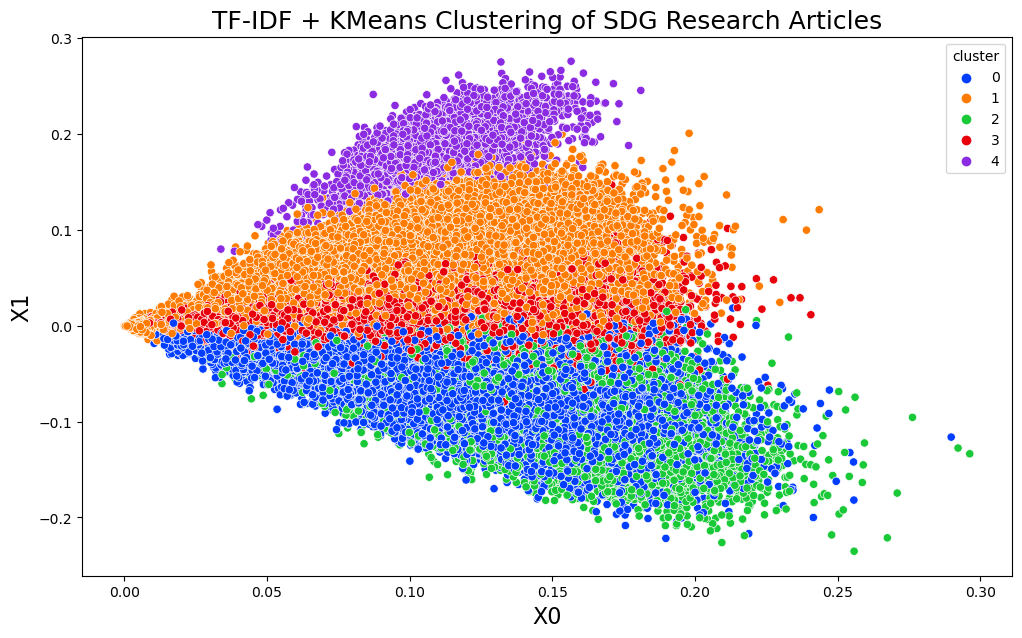

In [40]:
# set image size
plt.figure(figsize=(12, 7))
# set a title
plt.title("TF-IDF + KMeans Clustering of SDG Research Articles", fontdict={"fontsize": 18})
# set axes names
plt.xlabel("X0", fontdict={"fontsize": 16})
plt.ylabel("X1", fontdict={"fontsize": 16})
# create scatter plot with seaborn, where hue is the class used to group the data
sns.scatterplot(data=df_cleantext, x='x0', y='x1', hue='cluster', palette="bright", legend="full")
plt.show()

- The clustering shows many overlaps 
- KMeans is good at hard clustering where data points belong to exactly one cluster
- Results show that it is not a suitable method where the themes in research articles may overlap

### Evaluate cluster performance

In [43]:
from sklearn import metrics
# Compute DBI score
dbi = metrics.davies_bouldin_score(svd_vecs, clusters)

# Compute Silhoutte Score
ss = metrics.silhouette_score(svd_vecs, clusters , metric='euclidean')

# Print the DBI and Silhoutte Scores
print("DBI Score: ", dbi, "\nSilhoutte Score: ", ss)

DBI Score:  1.9368623374119411 
Silhoutte Score:  0.07131194765969863


DBI and Silhoutte scores are common measures of clustering performance. The following results are generated using Kmeans with a estiamted cluster size of 10 and a random sample of 10000 articles.

DBI Score:  4.070067945815481 \
Silhoutte Score:  -0.008647352207341146

- KMeans does not perfom well because a good clustering model produces a low DBI score and a high Silhoutte Score

Running DBSCAN repeatedly on random samples of 10000 articles with different initializations generates 0 number of clusters
- DBSCAN is does not perform well for clustering this text data

## 4. Topic modelling using LDA

- binarize the SDG columns for easy use in topic modelling

In [44]:
# function to binarize SDG probabilities
def binarize(prob):
    if prob >= 0.95:
        return 1
    else:
        return 0

In [45]:
# sdg_cols = ['SDG1', 'SDG2', 'SDG3', 'SDG4', 'SDG5', 'SDG6', 'SDG7', 'SDG8', 'SDG9', 'SDG10', 'SDG11', 'SDG12', 'SDG13', 'SDG14', 'SDG15', 'SDG16', 'SDG17']

# df_bin = df_articles[sdg_cols].applymap(binarize)

# df_bin.head()

NameError: name 'df_articles' is not defined

- extract the abstracts from the text data

In [46]:
# df_binsdg = pd.merge(df_articles[['date']], df_bin, left_index=True, right_index=True)
# df_binsdg.head()

NameError: name 'df_articles' is not defined

In [47]:
# df_final = pd.merge(df_binsdg, df_cleantext, left_index=True, right_index=True)
# df_final.head(2)

NameError: name 'df_binsdg' is not defined

- load the abstract from the dataframe

In [48]:
# # abstracts can be a good proxy for the full text because they summarise the main points in the articles
df_abstract = df_cleantext['abstract_processed']

### Implementing LDA model from abstracts only

In [49]:
# import necessary packages
from gensim.models import LdaModel
from gensim.corpora import Dictionary
from gensim.models.ldamulticore import LdaMulticore

# Create a dictionary from abstract_processed column
abstract_dict = Dictionary(df_cleantext['abstract_processed'].apply(lambda x: x.split()))

# Create a bag of words (dtm) from the abstract dictionary
abstract_corpus = [abstract_dict.doc2bow(doc) for doc in df_cleantext['abstract_processed'].apply(lambda x: x.split())]

# Set the number of topics
num_topics = 14

# Instantiate the LDA model and train it on the corpus
lda_model = LdaMulticore(corpus=abstract_corpus, id2word=abstract_dict, num_topics=num_topics, random_state=42, workers=4)

# print the top 10 words for each topic
topics = lda_model.print_topics(num_words=10)
for topic in topics:
    print(topic)

(0, '0.007*"activity" + 0.006*"compound" + 0.006*"acid" + 0.005*"concentration" + 0.005*"reaction" + 0.004*"rate" + 0.004*"protein" + 0.003*"site" + 0.003*"enzyme" + 0.003*"extract"')
(1, '0.022*"specie" + 0.007*"gene" + 0.007*"plant" + 0.006*"population" + 0.004*"sequence" + 0.004*"infection" + 0.004*"virus" + 0.004*"host" + 0.004*"genome" + 0.004*"disease"')
(2, '0.006*"policy" + 0.005*"economic" + 0.004*"right" + 0.004*"market" + 0.004*"government" + 0.004*"country" + 0.004*"state" + 0.004*"public" + 0.004*"social" + 0.003*"value"')
(3, '0.005*"field" + 0.005*"state" + 0.004*"energy" + 0.004*"algorithm" + 0.004*"function" + 0.003*"mass" + 0.003*"structure" + 0.003*"present" + 0.003*"space" + 0.003*"distribution"')
(4, '0.004*"hearing" + 0.004*"response" + 0.004*"image" + 0.003*"disorder" + 0.003*"difference" + 0.003*"level" + 0.003*"brain" + 0.003*"group" + 0.003*"rat" + 0.003*"imaging"')
(5, '0.005*"high" + 0.005*"change" + 0.005*"temperature" + 0.004*"soil" + 0.004*"climate" + 0.0

- Evaluate the LDA model

In [ ]:
from gensim.models import CoherenceModel

# Convert df_abstract to a list of tokenized documents
docs = df_abstract.apply(lambda x: x.split()).tolist()

# Compute coherence score using CV metric
coherence_model_lda = CoherenceModel(model=lda_model, texts=docs, dictionary=abstract_dict, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()

print(f'CV Coherence Score: {coherence_lda}')

# Compute coherence score using UMass metric
coherence_model_umass = CoherenceModel(model=lda_model, texts=docs, dictionary=abstract_dict, coherence='u_mass')
coherence_score_umass = coherence_model_umass.get_coherence()
print(f"UMass Coherence Score: {coherence_score_umass}")

# Compute coherence score using UCI metric
coherence_model_uci = CoherenceModel(model=lda_model, texts=docs, dictionary=abstract_dict, coherence='c_uci')
coherence_score_uci = coherence_model_uci.get_coherence()
print(f"UCI Coherence Score: {coherence_score_uci}")


CV Coherence Score: 0.5590407509208896
UMass Coherence Score: -2.4176140979368563


- The the CV Coherence score of >0.5 shows that LDA performs well in identifying coherent and meaningful topics.

### Adding keywords and title to the corpus, and observing if there is an improvement in performace
- LdaMulticore parallelizes operations to improve computational efficiency

In [ ]:
from gensim.models.ldamulticore import LdaMulticore


# Preprocess the text column
#abstracts = [doc.split() for doc in df_cleantext['abstract_processed']]
combined = [doc.split() for doc in df_cleantext['combined_text']]

# Create a dictionary from the text column
dictionary = Dictionary(combined)

# Preprocess the keywords column and create a bag-of-words representation
#keyword_docs = [[token for token in str(doc).split()] for doc in df_cleantext['keywords_processed'] if not pd.isna(doc)]

#keyword_corpus = [dictionary.doc2bow(doc) for doc in keyword_docs]

# Combine the text and keyword documents
# all_docs = abstracts + keyword_docs
all_docs = combined

# Combine the text and keyword corpora (into one dtm)
all_corpus = [dictionary.doc2bow(doc_words) for doc_words in combined]

# Train the LDA model
num_topics = 14
lda_model = LdaMulticore(corpus=all_corpus, id2word=dictionary, num_topics=num_topics, passes=10, random_state=42, workers=4) #, alpha=0.1, eta=0.1

- Evaluate the model again

In [ ]:
from gensim.models import CoherenceModel

# Convert df_abstract to a list of tokenized documents
docs = df_abstract.apply(lambda x: x.split()).tolist()

# Compute coherence score using CV metric
coherence_model_lda = CoherenceModel(model=lda_model, texts=all_docs, dictionary=dictionary, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print(f'CV Coherence Score: {coherence_lda}')

# Compute coherence score using UMass metric
coherence_model_umass = CoherenceModel(model=lda_model, texts=docs, dictionary=abstract_dict, coherence='u_mass')
coherence_score_umass = coherence_model_umass.get_coherence()
print(f"UMass Coherence Score: {coherence_score_umass}")

# Compute coherence score using UCI metric
coherence_model_uci = CoherenceModel(model=lda_model, texts=docs, dictionary=abstract_dict, coherence='c_uci')
coherence_score_uci = coherence_model_uci.get_coherence()
print(f"UCI Coherence Score: {coherence_score_uci}")


 - Compute other evaluation measures 

In [ ]:
# Compute perplexity
perplexity = lda_model.log_perplexity(all_corpus)
print(f"Perplexity: {perplexity}")

- The perplexity score measures how well the model predicts the unobserved data 
    - lower scores indicate better performance. 
    - this core indicates that the LDA has good prective performance

#### Calculate the entropies to measure topic diversity

In [ ]:
import pandas as pd
from scipy.stats import entropy

# Compute topic distribution for each document
topic_distributions = [lda_model[doc] for doc in all_corpus]

# Compute entropy of topic distribution for each document
document_entropies = [entropy([td[1] for td in doc]) for doc in topic_distributions]

# Calculate mean and standard deviation of entropy values
mean_entropy = pd.Series(document_entropies).mean()
std_entropy = pd.Series(document_entropies).std()

# Create a pandas dataframe to display the results
results_df = pd.DataFrame({'Document ID': range(len(all_docs)), 'Entropy': document_entropies})

# Append mean and standard deviation to the results dataframe
results_df = pd.concat([results_df,
                       pd.DataFrame({'Document ID': ['Mean', 'Std Dev'],
                                     'Entropy': [mean_entropy, std_entropy]})],
                      ignore_index=True)

# Display the results dataframe
print(results_df)


- the mean entropy of 0.8-0.9 shows that the corpus has a relatively diverse set of topics
- the standard deviation of about 0.4-0.5 indicates some relative variability (topics are relatively spread out among the artciles)

### Save model and objects for later use
- Save the topic-word matrix as a CSV file

In [ ]:
# Get the topic-word matrix
topic_word_matrix = lda_model.get_topics()

# Save the topic-word matrix as a CSV file
pd.DataFrame(topic_word_matrix).to_csv(folder_path + 'topic_word_matrix.csv', index=False)


- Specify the file paths for saving the model, corpus, and dictionary

In [ ]:

# Save the LDA model
lda_model.save(folder_path +  'saved_LDAmodel.model')

# Save the corpus
import pickle
with open(folder_path +  'saved_corpus.pkl', 'wb') as f:
    pickle.dump(all_corpus, f)

# Save the dictionary
dictionary.save(folder_path +  'saved_dict.pkl')

### Visualize the clusters using the pyLDAvis library

In [ ]:
# Get the names of the topics from the top 3 words of each topic
topic_names = []
for i in range(num_topics):
    topic_words = [word for word, prob in lda_model.show_topic(i, topn=3)]
    topic_name = ' '.join(topic_words)
    topic_names.append(topic_name)
    
print(topic_names)

In [ ]:
import pyLDAvis.gensim_models as gensimvis

pyLDAvis.enable_notebook()
# Visualize the topics using pyLDAvis
vis_data = gensimvis.prepare(lda_model, all_corpus, dictionary)

pyLDAvis.display(vis_data)


In [ ]:
pyLDAvis.save_html(vis_data, folder_path +  'LDA_image.html')

#### *** The next steps would be to deploy the visualization in a web app